In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles


(10000, 28, 28)

In [325]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(3, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 1.3789 - accuracy: 0.5330 - val_loss: 0.9511 - val_accuracy: 0.7113
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9094 - accuracy: 0.7271 - val_loss: 0.8096 - val_accuracy: 0.7563
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8144 - accuracy: 0.7530 - val_loss: 0.7547 - val_accuracy: 0.7724
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7721 - accuracy: 0.7676 - val_loss: 0.7395 - val_accuracy: 0.7717
Epoch 5/5
313/313 [==============================] - 0s 676us/step - loss: 0.7270 - accuracy: 0.7805
Test accuracy: 0.7805


In [151]:
test_labels.shape

(10000, 10)

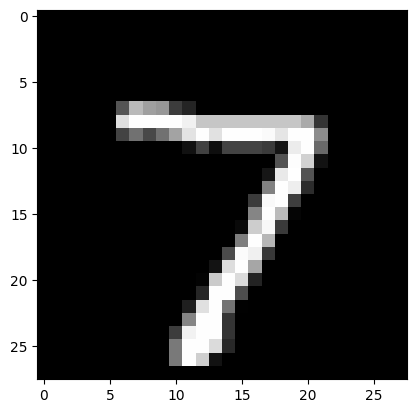

In [29]:
plt.imshow(test_images[0], cmap='gray') 

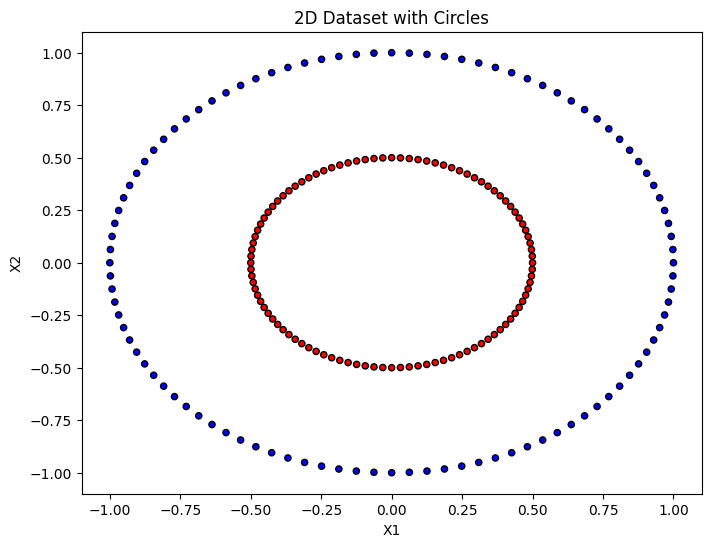

In [84]:
from sklearn.datasets import make_circles

# Generate circles dataset
X, y = make_circles(n_samples=200, noise=0, factor=0.5, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Dataset with Circles')
plt.show()



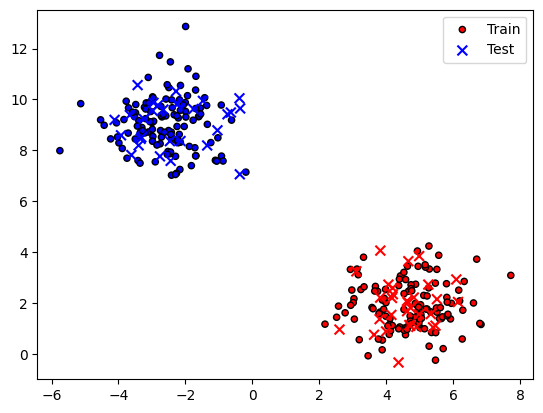

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.bwr, marker='x', s=50, label='Test')
plt.legend()

((160, 2), (160,))

In [611]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 2.1812 - accuracy: 0.5042 - val_loss: 2.2417 - val_accuracy: 0.4833
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 2.1526 - accuracy: 0.5042 - val_loss: 2.2114 - val_accuracy: 0.4833
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 2.1235 - accuracy: 0.5042 - val_loss: 2.1815 - val_accuracy: 0.4833
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 2.0938 - accuracy: 0.5042 - val_loss: 2.1519 - val_accuracy: 0.4833
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0657 - accuracy: 0.5042 - val_loss: 2.1217 - val_accuracy: 0.4833
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 2.0362 - accuracy: 0.5042 - val_loss: 2.0917 - val_accuracy: 0.4833
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 2.0067 - accuracy: 0.5042 - val_loss: 2.0622 - val_accuracy: 0.4833
Epoch 8/100
8/8 [=========

In [609]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 21ms/step


array([[-3.155958 ],
       [-3.2060597],
       [-3.2327418],
       [-2.4761221],
       [ 0.       ]], dtype=float32)

737/737 [==============================] - 1s 1ms/step


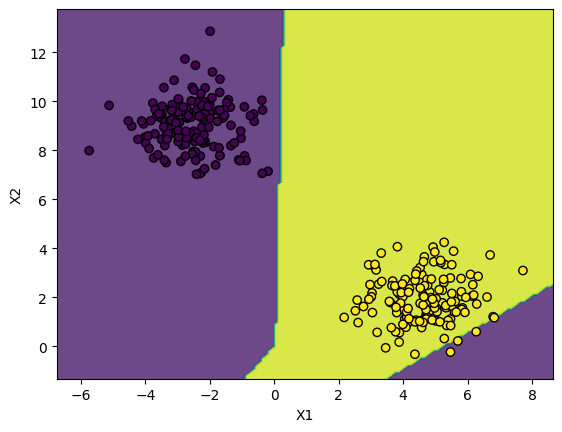

In [596]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, y)


In [557]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),  
])

model.compile(
              loss='mse',
              metrics=['accuracy'])

x_train = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y_train = [0, 0, 0, 1]  

history = model.fit(x_train, y_train, epochs=100, verbose=1)

model.evaluate(x_train, y_train)


Epoch 1/100
1/1 [==============================] - 1s 594ms/step - loss: 0.2877 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2869 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2864 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2856 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2852 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2845 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.5000
Epoch 11/100
1/1 [========

[0.26291415095329285, 0.5]

((240,), (240, 2), 1, array([5.94535764, 1.99417353]))

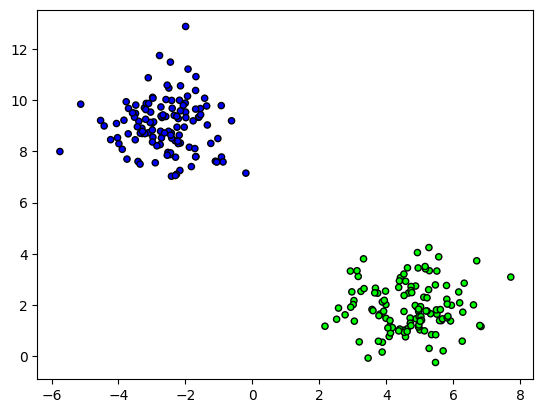

In [588]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Generate dataset with 5 classes
n_samples = 300
n_features = 2
n_classes = 2

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=1.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20)

# encoder = OneHotEncoder(sparse=False)
# y_train = encoder.fit_transform(y_train.reshape(-1, 1))
# y_test = encoder.transform(y_test.reshape(-1, 1))


y_train.shape, X_train.shape, y_train[0], X_train[0]

In [606]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
8/8 [==============================] - 0s 23ms/step - loss: 0.3653 - accuracy: 0.1458 - val_loss: 0.2248 - val_accuracy: 0.5500
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.6708 - val_loss: 0.1531 - val_accuracy: 0.7667
Epoch 3/40
8/8 [==============================] - 0s 7ms/step - loss: 0.1293 - accuracy: 0.8458 - val_loss: 0.1145 - val_accuracy: 0.9667
Epoch 4/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0971 - accuracy: 0.9875 - val_loss: 0.0886 - val_accuracy: 1.0000
Epoch 5/40
8/8 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 6/40
8/8 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 7/40
8/8 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 8/40
8/8 [=================

In [600]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 28ms/step


array([[0.00916768],
       [0.0125807 ],
       [0.02795647],
       [0.2599823 ],
       [0.5377277 ]], dtype=float32)

737/737 [==============================] - 1s 672us/step


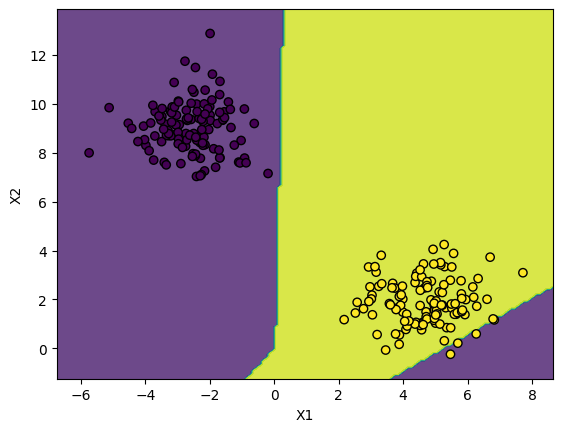

In [598]:
plot_decision_boundary(model, X_train, y_train)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])